In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [10]:
# Load the dataset
data = pd.read_csv('Housing.csv')


In [11]:
# Display the first few rows of the dataset
print(data.head())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

In [12]:
# List of categorical and numerical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [13]:
# Define features and target variable
X = data.drop(columns='price')
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


In [15]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [16]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1754318687330.6677
R^2 Score: 0.6529242642153177


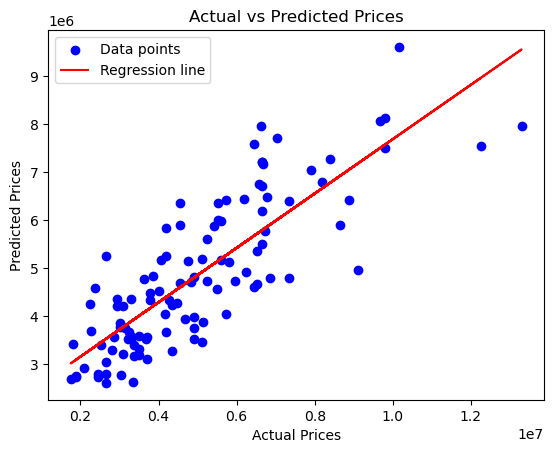

In [20]:
# Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred, color='blue', label='Data points')

# Fit a line to the scatter plot
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', label='Regression line')

# Add labels, title, and legend
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()
